# LAPO MICROFINANCE PROJECT - 
MILESTONE 1
# Exploratory Data Analysis (EDA) 
Notebook
# Dataset: Loan_default.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Load Dataset

In [2]:
file_path = r"C:\Users\wuser\OneDrive - Nexford University\New Folder\Loan_default.csv"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully.\n")

Dataset Loaded Successfully.



# 2. Overview

In [3]:
print("\nHEAD:")
print(df.head())

print("\nINFO:")
print(df.info())

print("\nSUMMARY STATISTICS:")
print(df.describe(include="all"))



HEAD:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-t

# 3.Check for Missing Values

In [4]:
print("\nMISSING VALUES:")
print(df.isnull().sum())



MISSING VALUES:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


# 4. Data Cleaning

# Identify numeric and categorical columns

In [5]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Remove ID column from categorical columns

In [6]:
if "LoanID" in cat_cols:
    cat_cols = cat_cols.drop("LoanID")

# Fill numeric missing values with median

In [7]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing values with mode

In [8]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


# 5. Feature Engineering 
# Debt-to-Income Ratio was provided as DTIRatio
# We will create a new stability ratio

In [9]:
df["Income_to_Loan"] = df["Income"] / (df["LoanAmount"] + 1)

# Employment stability indicator

In [10]:
df["Employment_Stability"] = np.where(df["MonthsEmployed"] > 12, 1, 0)

# 6. Outlier Handling (Winsorization)

In [11]:
for col in ["Income", "LoanAmount", "CreditScore", "InterestRate", "DTIRatio"]:
    df[col] = np.clip(df[col], df[col].quantile(0.01), df[col].quantile(0.99))

# 7. Encoding 
# To avoid MemoryError → Use Label Encoding

In [12]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])


# Drop LoanID (high-cardinality, not useful)

In [13]:
if "LoanID" in df.columns:
    df.drop(columns=["LoanID"], inplace=True)

# 8. Correlation Heatmap

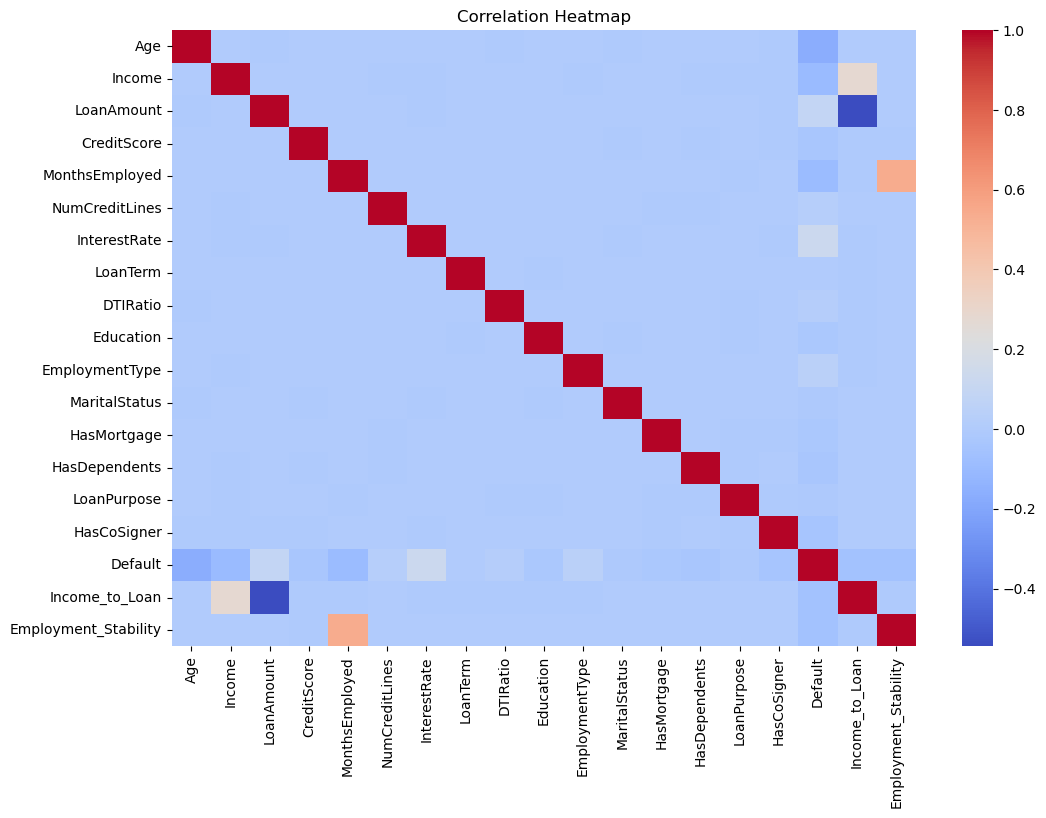

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 9. Export Cleaned Dataset

In [15]:
output_path = r"C:\Users\wuser\OneDrive - Nexford University\New Folder\loan_default_cleaned.csv"

df.to_csv(output_path, index=False)

print(f"\nCleaned dataset exported successfully → {output_path}")


Cleaned dataset exported successfully → C:\Users\wuser\OneDrive - Nexford University\New Folder\loan_default_cleaned.csv
